In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sanskrit-english-dataset/combined.csv


**Here the task is to build up RNN encoder decoder based Language transaltor for Sanskrit to English**

In [2]:
import numpy as np           # NumPy for numerical computations 
import pandas as pd          # Pandas is a data manipulation and analysis 
import matplotlib.pyplot as plt  # Data visualizations.
import seaborn as sns        # Data visualization r
import tensorflow as tf      # Open-source machine learning framework 
import plotly.express as px  # Interactive and expressive plots- data viz
import tensorflow_datasets as tfds  # For downloading and preparing machine learning datasets.
from tensorflow import keras  # Open-source deep learning framework for neural network
from keras import layers     # Keras layers for building neural networks.
from colorama import Fore, Style  # Colorama is used for colored terminal text
from IPython.core.display import HTML  # IPython provides enhanced interactive programming in Python.

from tensorflow.keras.layers import Input, Embedding, LSTM, Dense  # Additional Keras layers for building neural network architectures.

from tensorflow.keras import backend as K # For low-level operations and utilities for TensorFlow and Keras.
from tensorflow.random import set_seed # Set a seed for random number generators.

# Print the version of each library
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"TensorFlow Datasets version: {tfds.__version__}")
print(f"Keras version: {keras.__version__}")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NumPy version: 1.23.5
Pandas version: 2.0.3
Seaborn version: 0.12.2
TensorFlow version: 2.12.0
TensorFlow Datasets version: 4.9.2
Keras version: 2.12.0


In [3]:
pip --version


pip 23.1.2 from /opt/conda/lib/python3.10/site-packages/pip (python 3.10)
Note: you may need to restart the kernel to use updated packages.


Based on the library Colorama, beautifying the print statement

In [4]:
from colorama import Fore, Style
from IPython.core.display import HTML

K = keras.backend
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None
FONT_COLOR = "#141B4D"
BACKGROUND_COLOR = "#F6F5F5"
CLR = (Style.BRIGHT + Fore.BLACK) if ON_KAGGLE else (Style.BRIGHT + Fore.WHITE)
RED = Style.BRIGHT + Fore.RED
BLUE = Style.BRIGHT + Fore.BLUE
CYAN = Style.BRIGHT + Fore.CYAN
RESET = Style.RESET_ALL
NOTEBOOK_PALETTE = {
    "DeepPlum": "#3F384A",
    "RubyRed": "#E04C5F",
    "SunburstOrange": "#FFB74D",
}


In [5]:
df = "/kaggle/input/sanskrit-english-dataset/combined.csv"
df = pd.read_csv(df, encoding="utf-8", engine="pyarrow")
df = df.sample(len(df), random_state=42)
df.head()

,book,volume,parva,cnum,chapter,description,shloka,sn,en
44195,mahabharata,vol-iii,BHAGAVAD-YANA PARVA,166,96,The story of Dambhodbhava,16,स राजा महतीं सेनां योजयित्वा षडङ्गिनीम्। अमृष्...,"The king, having collected a large army consis..."
47393,mahabharata,vol-iv,JAMBUKHANDA VINIRMANA PARVA,3,3,Various indications of the Jambukhanda,46,वैशम्पायन उवाच पितुर्वचो निशम्यैतद् धृतराष्ट्र...,Dhritarashtra said Having heard the words of f...
20718,mahabharata,vol-i,ASTIKA PARVA,32,32,Story of Garuda,20,आवृण्वानं महाज्वालमर्चिभिः सर्वतोऽम्बरम्। दहन्...,The terrible flames of that fire covered whole...
24340,mahabharata,vol-i,JATUGRIHA,149,149,Crossing the Ganges,12,पाण्डवाश्च महात्मानः प्रतिसंदिश्य वै कवेः। गङ्...,"The illustrious Pandavas also, sending some me..."
34011,mahabharata,vol-ii,TIRTHAYATRA PARVA,157,157,The destruction Jatasura,40,बडिशोऽयं त्वया ग्रस्तः कालसूत्रेण लम्बितः। मत्...,"(By thus allowing you to commit this act), you..."


In [6]:
# Get the memory usage (space)
memory_usage = df.memory_usage(deep=True).sum() / (1024**2)  # Convert bytes to megabytes

print(f"Memory usage: {memory_usage:.2f} MB")

Memory usage: 81.26 MB


In [7]:
# printing the columns name
df.columns

Index(['book', 'volume', 'parva', 'cnum', 'chapter', 'description', 'shloka',
       'sn', 'en'],
      dtype='object')

In [8]:
df.head(5)

,book,volume,parva,cnum,chapter,description,shloka,sn,en
44195,mahabharata,vol-iii,BHAGAVAD-YANA PARVA,166,96,The story of Dambhodbhava,16,स राजा महतीं सेनां योजयित्वा षडङ्गिनीम्। अमृष्...,"The king, having collected a large army consis..."
47393,mahabharata,vol-iv,JAMBUKHANDA VINIRMANA PARVA,3,3,Various indications of the Jambukhanda,46,वैशम्पायन उवाच पितुर्वचो निशम्यैतद् धृतराष्ट्र...,Dhritarashtra said Having heard the words of f...
20718,mahabharata,vol-i,ASTIKA PARVA,32,32,Story of Garuda,20,आवृण्वानं महाज्वालमर्चिभिः सर्वतोऽम्बरम्। दहन्...,The terrible flames of that fire covered whole...
24340,mahabharata,vol-i,JATUGRIHA,149,149,Crossing the Ganges,12,पाण्डवाश्च महात्मानः प्रतिसंदिश्य वै कवेः। गङ्...,"The illustrious Pandavas also, sending some me..."
34011,mahabharata,vol-ii,TIRTHAYATRA PARVA,157,157,The destruction Jatasura,40,बडिशोऽयं त्वया ग्रस्तः कालसूत्रेण लम्बितः। मत्...,"(By thus allowing you to commit this act), you..."


In [9]:
df.shape

(93030, 9)

The dataset consist fo 93030 records with 9 columns.

In [10]:
import plotly.express as px
#Calculate the number of English and French words in each sentence
df["English Words in Sentence"] = df["en"].str.split().apply(len)
df["Sanskrit Words in Sentence"] = df["sn"].str.split().apply(len)

# Define placeholder values for FONT_COLOR and BACKGROUND_COLOR
FONT_COLOR = "black"
BACKGROUND_COLOR = "white"

# Create a histogram plot
fig = px.histogram(
    df,
    x=["English Words in Sentence", "Sanskrit Words in Sentence"],
    color_discrete_sequence=["#0693E3", "#9900EF"],
    labels={" ": "Variable", "value": "Words in Sentence"},
    marginal="box",
    barmode="group",
    height=540,
    width=840,
    title="Words in Sentence",
)
fig.update_layout(
    font_color=FONT_COLOR,
    title_font_size=18,
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.02, x=1),
    yaxis_title="Count",
)
fig.show()

* Max English words in a sentence is 2103
* Sanskrit words have 528 workds
* Distribution of both seems to have Right skewness

In [11]:
fig = px.histogram(
    df,
    x=["English Words in Sentence", "Sanskrit Words in Sentence"],
    color_discrete_sequence=["#0693E3", "#9900EF"],
    labels={"variable": "Variable", "value": "Words in Sentence"},
    marginal="box",
    barmode="group",
    height=540,
    width=840,
    title="Words in Sentence - 0 to 200 Words",
)
fig.update_layout(
    font_color=FONT_COLOR,
    title_font_size=18,
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.02, x=1),
    yaxis_title="Count",
    xaxis_range=[0, 200],  # Set the x-axis range to show up to 500 words
)


fig.show()

With enlarging the view and looking into 200 words in sentences sanskrit sentences have narrow distribution while english have broder and are more normal distribution.

In [12]:
fig = px.histogram(
    df,
    x=["English Words in Sentence", "Sanskrit Words in Sentence"],
    color_discrete_sequence=["#0693E3", "#9900EF"],
    labels={"variable": "Variable", "value": "Words in Sentence"},
    marginal="box",
    barmode="group",
    height=540,
    width=840,
    title="Words in Sentence - 0 to 50 Words",
)
fig.update_layout(
    font_color=FONT_COLOR,
    title_font_size=18,
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.02, x=1),
    yaxis_title="Count",
    xaxis_range=[0, 50],  # Set the x-axis range to show up to 500 words
)


fig.show()

Looking at the box plot for upto 5o words, the Sanskrit words in sentences have normal distributuon while english still shows slight right skewness,

In [13]:
df.head()

,book,volume,parva,cnum,chapter,description,shloka,sn,en,English Words in Sentence,Sanskrit Words in Sentence
44195,mahabharata,vol-iii,BHAGAVAD-YANA PARVA,166,96,The story of Dambhodbhava,16,स राजा महतीं सेनां योजयित्वा षडङ्गिनीम्। अमृष्...,"The king, having collected a large army consis...",29,10
47393,mahabharata,vol-iv,JAMBUKHANDA VINIRMANA PARVA,3,3,Various indications of the Jambukhanda,46,वैशम्पायन उवाच पितुर्वचो निशम्यैतद् धृतराष्ट्र...,Dhritarashtra said Having heard the words of f...,21,10
20718,mahabharata,vol-i,ASTIKA PARVA,32,32,Story of Garuda,20,आवृण्वानं महाज्वालमर्चिभिः सर्वतोऽम्बरम्। दहन्...,The terrible flames of that fire covered whole...,23,6
24340,mahabharata,vol-i,JATUGRIHA,149,149,Crossing the Ganges,12,पाण्डवाश्च महात्मानः प्रतिसंदिश्य वै कवेः। गङ्...,"The illustrious Pandavas also, sending some me...",28,8
34011,mahabharata,vol-ii,TIRTHAYATRA PARVA,157,157,The destruction Jatasura,40,बडिशोऽयं त्वया ग्रस्तः कालसूत्रेण लम्बितः। मत्...,"(By thus allowing you to commit this act), you...",30,8


In [14]:
# List of columns to drop
columns_to_drop = ['book', 'volume', 'parva', 'cnum', 'chapter', 'description', 'shloka']

# Drop the specified columns
df = df.drop(columns_to_drop, axis=1)


In [15]:
df.head()

,sn,en,English Words in Sentence,Sanskrit Words in Sentence
44195,स राजा महतीं सेनां योजयित्वा षडङ्गिनीम्। अमृष्...,"The king, having collected a large army consis...",29,10
47393,वैशम्पायन उवाच पितुर्वचो निशम्यैतद् धृतराष्ट्र...,Dhritarashtra said Having heard the words of f...,21,10
20718,आवृण्वानं महाज्वालमर्चिभिः सर्वतोऽम्बरम्। दहन्...,The terrible flames of that fire covered whole...,23,6
24340,पाण्डवाश्च महात्मानः प्रतिसंदिश्य वै कवेः। गङ्...,"The illustrious Pandavas also, sending some me...",28,8
34011,बडिशोऽयं त्वया ग्रस्तः कालसूत्रेण लम्बितः। मत्...,"(By thus allowing you to commit this act), you...",30,8


In [16]:
df.columns

Index(['sn', 'en', 'English Words in Sentence', 'Sanskrit Words in Sentence'], dtype='object')

In [17]:
# Rearranging the columns

df = df[['en','sn','English Words in Sentence','Sanskrit Words in Sentence']]

In [18]:
df.head()

,en,sn,English Words in Sentence,Sanskrit Words in Sentence
44195,"The king, having collected a large army consis...",स राजा महतीं सेनां योजयित्वा षडङ्गिनीम्। अमृष्...,29,10
47393,Dhritarashtra said Having heard the words of f...,वैशम्पायन उवाच पितुर्वचो निशम्यैतद् धृतराष्ट्र...,21,10
20718,The terrible flames of that fire covered whole...,आवृण्वानं महाज्वालमर्चिभिः सर्वतोऽम्बरम्। दहन्...,23,6
24340,"The illustrious Pandavas also, sending some me...",पाण्डवाश्च महात्मानः प्रतिसंदिश्य वै कवेः। गङ्...,28,8
34011,"(By thus allowing you to commit this act), you...",बडिशोऽयं त्वया ग्रस्तः कालसूत्रेण लम्बितः। मत्...,30,8


### Choosing 5% of the data randomly

From 93030 of records 5% of it is choosen as the the:
  * Deep learning models are computationally intensive. By selecting only 5% of the data, you reduce the computational burden while still retaining a representative sample of the dataset.
  * Using Kaggle notebook and GPU is limited and such massive amount of data utilize huge amount of GPU.

  


The main reason for  choosing 5% of the data randomly for deep learning is to balances computational efficiency, resource optimization, and effective model development. It allows for faster prototyping, model assessment, and resource management, ultimately leading to more efficient and cost-effective deep learning mvp.

In [19]:
# Choose 5% of the data randomly
percentage_to_select = 0.05
sdf = df.sample(frac=percentage_to_select, random_state=42)

# Verify the shape of the selected_easy_dataset
print("Selected Data Shape:", sdf.shape)

Selected Data Shape: (4652, 4)


### Some Viz

In [20]:
# Calculate the statistics
english_avg = sdf['English Words in Sentence'].mean()
english_max = sdf['English Words in Sentence'].max()

sanskrit_avg = sdf['Sanskrit Words in Sentence'].mean()
sanskrit_max = sdf['Sanskrit Words in Sentence'].max()

# Create a DataFrame for visualization
data = {
    'Language': ['English', 'English', 'Sanskrit', 'Sanskrit'],
    'Statistic': ['Average', 'Maximum', 'Average', 'Maximum'],
    'Value': [english_avg, english_max, sanskrit_avg,sanskrit_max]
}
summary_df = pd.DataFrame(data)

# Create a bar plot using Plotly
fig = px.bar(summary_df, x='Language', y='Value', color='Statistic',
             labels={'Value': 'Word Count'}, title="Word Count Statistics",
             barmode='group')

# Show the plot
fig.show()

English words have more count to words compared to Sanskrit

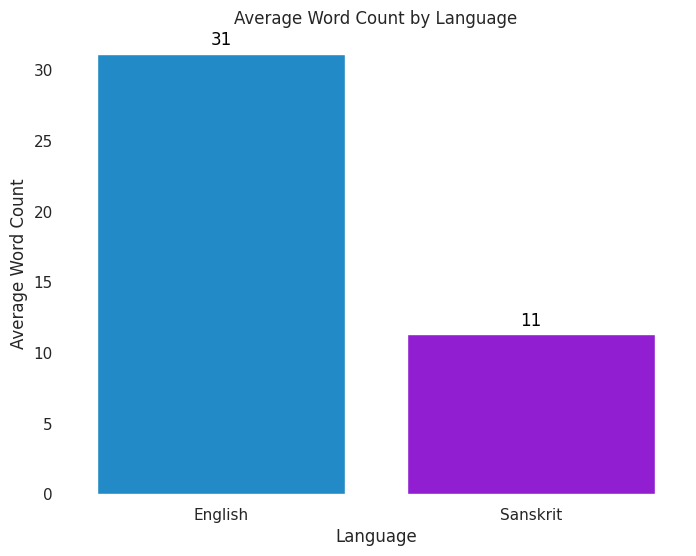

In [21]:
# Calculate the average values for both columns
english_avg = sdf['English Words in Sentence'].mean()
sanskrit_avg = sdf['Sanskrit Words in Sentence'].mean()

# Create a DataFrame for visualization
data = {
    'Language': ['English', 'Sanskrit'],
    'Average Word Count': [english_avg, sanskrit_avg]
}
summary_df = pd.DataFrame(data)

# Create a bar plot with custom colors and remove outer box
sns.set(style="white")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Language', y='Average Word Count', data=summary_df, palette=["#0693E3", "#9900EF"])

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Beautify the plot and remove outer box
plt.title("Average Word Count by Language")
plt.xlabel("Language")
plt.ylabel("Average Word Count")
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()

Average words count per sentence in Sanskrit is less compared to English by 20 words.


###  Preparing for train and test

Here we prepare the training dataset and validation dataset. We assign 10% of the dataset to validation.

In [22]:

# Pull the English and Sanskrit sentences from the DataFrame
sentences_en = sdf["en"].to_numpy()
sentences_sn = sdf["sn"].to_numpy()

# set to 0.1, indicating that 10% of the data will be used for validation
valid_fraction = 0.1

# Calculating the number of data points to be used for validation
valid_len = int(valid_fraction * len(sdf))

# Creating the training and validation set

sentences_sn_train = sentences_sn[:-valid_len]  # Training data for English sentences
# Here `-valid_len` for  selecting all data points except the last valid_len data points

sentences_en_train = sentences_en[:-valid_len]  # Training data for Sanskrit sentences


sentences_sn_valid = sentences_sn[-valid_len:]  # Validation data for English sentences


sentences_en_valid = sentences_en[-valid_len:]  # Validation data for Sanskrit sentences


### Encoder and Decoder RNN

* Here we will be  creating data pipelines in TensorFlow for Enconder and Decoder
* We need two inputs and one target
* First input will be Sanskrit sentence which is passed to encoder and English to Decoder
* The decoder operates one timestamp earlier than the encoder.
* To synchronize the encoder and decoder, a special token called 'start of a sequence' (SOS) will be introduced.
* The SOS token acts as an indicator or trigger for the decoder to start generating the translated output.
* In addition to SOS, the target sequence includes another unique token known as 'end of a sequence' (EOS).
* The EOS token serves as a marker to indicate the completion of the translation process.
* When the decoder generates the EOS token, it signals that the translation process is finished.

In [23]:
def prepare_input_and_target(sentences_sn, sentences_en):
    """Return data in the format: `((encoder_input, decoder_input), target)`"""
    return (sentences_sn, b"startofseq " + sentences_en), sentences_en + b" endofseq"


def from_sentences_dataset(
    sentences_sn,
    sentences_en,
    batch_size=32,
    cache=True,
    shuffle=False,
    shuffle_buffer_size=10_000,
    seed=None,
):
    """Creates `TensorFlow` dataset for encoder-decoder RNN from given sentences."""
    dataset = tf.data.Dataset.from_tensor_slices((sentences_sn, sentences_en)

### Benchmarking

Here, we will be using benchmarking as it is a technique of evaluating and measuring the performance of the data pipeline or dataset with the goal of assessing its efficiency, speed, and resource utilization.

In [24]:

# Creating a TensorFlow dataset for benchmarking with training data
benchmark_ds = from_sentences_dataset(sentences_sn_train, sentences_en_train)

# Prefetching the dataset for improved performance
benchmark_ds = benchmark_ds.prefetch(tf.data.AUTOTUNE)

# Conducting benchmarking using TFDS
bench_results = tfds.benchmark(benchmark_ds, batch_size=32)



************ Summary ************



  0%|          | 0/131 [00:00<?, ?it/s]

Examples/sec (First included) 20149.04 ex/sec (total: 4224 ex, 0.21 sec)
Examples/sec (First only) 403.19 ex/sec (total: 32 ex, 0.08 sec)
Examples/sec (First excluded) 32179.29 ex/sec (total: 4192 ex, 0.13 sec)


* First Inluded - It is first batch of data included in the benchmark. It indicates that the benchmark achieved an average processing rate of 21,207.54 examples (data points) per second. The "total" shows that 4,224 examples were processed in 0.20 seconds.

* First Only-  reports performance metrics for the first batch of data exclusively.Here, only 32 examples were processed, and it took 0.03 seconds.

* First Excluded- performance metrics for all batches except the first one. It shows that the processing rate for the remaining batches was 25,263.72 examples per second. A total of 4,192 examples were processed in 0.17 seconds.

In [25]:
example_ds = from_sentences_dataset(
    sentences_sn_train, sentences_en_train, batch_size=4
)
list(example_ds.take(1))[0]

((<tf.Tensor: shape=(4,), dtype=string, numpy=
  array([b'\xe0\xa4\xa4\xe0\xa4\xa4\xe0\xa5\x8b \xe0\xa4\xa6\xe0\xa4\x97\xe0\xa5\x8d\xe0\xa4\xa7\xe0\xa4\xbe\xe0\xa4\xb5\xe0\xa4\xbf\xe0\xa4\xae\xe0\xa5\x8c \xe0\xa4\xaa\xe0\xa4\x95\xe0\xa5\x8d\xe0\xa4\xb7\xe0\xa5\x8c \xe0\xa4\xa8 \xe0\xa4\xa6\xe0\xa4\x97\xe0\xa5\x8d\xe0\xa4\xa7\xe0\xa5\x8c \xe0\xa4\xa4\xe0\xa5\x81 \xe0\xa4\x9c\xe0\xa4\x9f\xe0\xa4\xbe\xe0\xa4\xaf\xe0\xa5\x81\xe0\xa4\xb7\xe0\xa4\x83\xe0\xa5\xa4 \xe0\xa4\xa4\xe0\xa4\xa6\xe0\xa4\xbe \xe0\xa4\xae\xe0\xa5\x87 \xe0\xa4\x9a\xe0\xa4\xbf\xe0\xa4\xb0\xe0\xa4\xa6\xe0\xa5\x83\xe0\xa4\xb7\xe0\xa5\x8d\xe0\xa4\x9f\xe0\xa4\x83 \xe0\xa4\xb8 \xe0\xa4\xad\xe0\xa5\x8d\xe0\xa4\xb0\xe0\xa4\xbe\xe0\xa4\xa4\xe0\xa4\xbe \xe0\xa4\x97\xe0\xa5\x83\xe0\xa4\xa7\xe0\xa5\x8d\xe0\xa4\xb0\xe0\xa4\xaa\xe0\xa4\xa4\xe0\xa4\xbf\xe0\xa4\x83 \xe0\xa4\xaa\xe0\xa5\x8d\xe0\xa4\xb0\xe0\xa4\xbf\xe0\xa4\xaf\xe0\xa4\x83\xe0\xa5\xa5 \xe0\xa4\xa8\xe0\xa4\xbf\xe0\xa4\xb0\xe0\xa5\x8d\xe0\xa4\xa6\xe0\xa4\x97\xe0\xa5\x8d\xe0

In [26]:
example_ds.cardinality()  # Number of batches per epoch.

<tf.Tensor: shape=(), dtype=int64, numpy=1047>

In [27]:
example_ds = from_sentences_dataset(
    sentences_en_train, sentences_sn_train, batch_size=4
)
# Retrieve the first batch
first_batch = list(example_ds.take(1))[0]

# Access the elements of the tensors
inputs, target = first_batch

# Decode the target tensor from bytes to a readable string
decoded_target = [item.decode('utf-8') for item in target.numpy()]

# Print the decoded target (Sanskrit text)
for sentence in decoded_target:
    print(sentence)

ततो दग्धाविमौ पक्षौ न दग्धौ तु जटायुषः। तदा मे चिरदृष्टः स भ्राता गृध्रपतिः प्रियः॥ निर्दग्धपक्षः पतितो ह्यहमस्मिन् महागिरौ। endofseq
भीष्म उवाच स्पृहा स्याद् गर्हिता चैव विधित्सा चैव कर्मणाम्। आक्रोष्टा क्रुश्यते चैव वञ्चितो बुद्ध्यते स च॥ endofseq
देवानामसुराणां च परस्परजिगीषया॥ बभूव प्रथमो राजन् संग्रामस्तारकामयः। endofseq
कस्तस्य शक्नुयाद् वक्तुं गुणान् कात्स्र्येन माधवा किं तु देवस्य महत: संक्षिप्तार्थपदाक्षरम्॥ endofseq


In [28]:
# Besutifying the output

class ColoramaVerbose(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            f"{CLR}Epoch: {RED}{epoch + 1:02d}{CLR} -",
            f"{CLR}loss: {RED}{logs['loss']:.5f}{CLR} -",
            f"{CLR}accuracy: {RED}{logs['accuracy']:.5f}{CLR} -",
            f"{CLR}val_loss: {RED}{logs['val_loss']:.5f}{CLR} -",
            f"{CLR}val_accuracy: {RED}{logs['val_accuracy']:.5f}",
        )

Here we will setup the configuring, training, and evaluating a neural network model for translation tasks, with provisions for early stopping and dynamic learning rate scheduling

In [29]:
def adapt_compile_and_fit(
    model,
    train_dataset,
    valid_dataset,
    n_epochs=25,
    n_patience=5,
    init_lr=0.001,
    lr_decay_rate=0.1,
    colorama_verbose=False,
):


    with tf.device('/GPU:0'):  # Set operations to run on the GPU
         # Adapt vectorization layers to the English and Sanskrit training data.
        model.vectorization_sn.adapt(
            train_dataset.map(
                lambda sentences, target: sentences[1],  # Sanskrit sentences.
                num_parallel_calls=tf.data.AUTOTUNE,
            )
        )
        model.vectorization_en.adapt(
            train_dataset.map(
                lambda sentences, target: sentences[0] + b" endofseq",  # English sentences.
                num_parallel_calls=tf.data.AUTOTUNE,
            )
        )
        
        # Prepare the training and validation datasets for vectorization and prefetching.

        train_dataset_prepared = train_dataset.map(
            lambda sentences, target: (sentences, model.vectorization_sn(target)),
            num_parallel_calls=tf.data.AUTOTUNE,
        ).prefetch(tf.data.AUTOTUNE)

        valid_dataset_prepared = valid_dataset.map(
            lambda sentences, target: (sentences, model.vectorization_sn(target)),
            num_parallel_calls=tf.data.AUTOTUNE,
        ).prefetch(tf.data.AUTOTUNE)
        
        # Set up early stopping callback for monitoring validation accuracy
        early_stopping_cb = keras.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=n_patience, restore_best_weights=True
        )

        # Calculate the number of decay steps for the learning rate schedule
        n_decay_steps = n_epochs * len(list(train_dataset_prepared))
        
        # Create a learning rate schedule with exponential decay
        scheduled_lr = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=init_lr,
            decay_steps=n_decay_steps,
            decay_rate=lr_decay_rate,
        )
        
        # Set up model callbacks, including early stopping and optional colorama verbose
        model_callbacks = [early_stopping_cb]
        verbose_level = 1
        if colorama_verbose:
            model_callbacks.append(ColoramaVerbose())
            verbose_level = 0
            
        # Compile the model with loss, optimizer, and metrics.
        model.compile(
            loss="sparse_categorical_crossentropy",
            optimizer=keras.optimizers.RMSprop(learning_rate=scheduled_lr),
            metrics=["accuracy"],
        )
        # Train the model using the prepared datasets and callbacks.
        return model.fit(
            train_dataset_prepared,
            epochs=n_epochs,
            validation_data=valid_dataset_prepared,
            callbacks=model_callbacks,
            verbose=verbose_level,
        )

In [30]:

# Checking the data structure of the sentences
first_element = next(iter(example_ds))  # Retrieve the first element in the dataset.

# Access sentences[0] within the tuple.
sentences_0_data = first_element[0][0]
sentences_1_data = first_element[1][1]

# Display the contents of sentences.
print("English \n", sentences_0_data)
print()
print("Sanskrit \n",sentences_1_data)



English 
 tf.Tensor(
[b'In consequence of which my wings were burnt but those of Jatayu were not. That was the last time when I saw my dear brother, the king of the vultures. My wings being burnt I fell down and have been since lying on this mighty mountain."'
 b'Bhishma said Malevolent persons always commit sinful acts and feel an irresistible inclination for doing them. They speak ill of others and are themselves censured. They always consider themselves as cheated of what is their due.'
 b'O monarch, there had taken place a dreadful battle, that had its root in Taraka, between the celestials and the Asuras, each of which parties was most desirous of defeating : the other.'
 b'Such being the fact, who is there O Mahadeva, that can recite the qualities of Mahadeva in full? I shall, however-through the favour of that illustrious supreme and perfectly wise Deity, extended to me for my devotion to him,-recite his attributes in an abstract of few words and letters.'], shape=(4,), dtype=st

The translate function takes a trained translation model and an input sentence in Sanskrit and generates a translation in English. Here is an overview of the key steps:

In [31]:

def translate(model, sentence_sn):
    translation = ""
    for word_idx in range(model.max_sentence_len):
        X_encoder = np.array([sentence_sn])
        X_decoder = np.array(["startofseq " + translation])
        # Last token's probas.
        y_proba = model.predict((X_encoder, X_decoder), verbose=0)[0, word_idx]

        if word_idx >= len(model.vectorization_en.get_vocabulary()):
            # Handle the case where the word index is out of range
            translation += " [INDEX_OUT_OF_RANGE]"
        else:
            predicted_word_id = np.argmax(y_proba)
            predicted_word = model.vectorization_en.get_vocabulary()[predicted_word_id]
            if predicted_word == "endofseq":
                break
            elif predicted_word == "[UNK]":
                # If the model predicts "UNK," use the original word from the input sentence.
                predicted_word = sentence_en.split()[word_idx]
            translation += " " + predicted_word

    return translation.strip()




### Bidirectional Encoder Decoder With Attention 

Here we define a deep learning model for machine translation by using  bidirectional LSTMs and an attention mechanism to generate translations from one language (e.g., Sanskrit) to another (e.g., English). 

* The model preprocesses and embeds input sequences, captures relevant information from the input using bidirectional LSTMs, and employs attention mechanisms to generate translations.

* The output is a probability distribution over the target language's vocabulary, allowing it to predict the next word in the translation.

* The class is designed for training and using a powerful machine translation model.

In [32]:


class BidirectionalEncoderDecoderWithAttention(keras.Model):
    def __init__(
        self,
        vocabulary_size=5000,
        max_sentence_len=50,
        embedding_size=256,
        n_units_lstm=512,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.max_sentence_len = max_sentence_len
     # Define TextVectorization layers for English and Sanskrit sequences.
        self.vectorization_en = layers.TextVectorization(
            vocabulary_size, output_sequence_length=max_sentence_len
        )
        self.vectorization_sn = layers.TextVectorization(
            vocabulary_size, output_sequence_length=max_sentence_len
        )
        
        
        # Define Embedding layers for encoder and decoder inputs.

        self.encoder_embedding = layers.Embedding(
            vocabulary_size, embedding_size, mask_zero=True
        )
        self.decoder_embedding = layers.Embedding(
            vocabulary_size, embedding_size, mask_zero=True
        )
        
        # Define Bidirectional LSTM layers for encoder.
        self.encoder = layers.Bidirectional(
            layers.LSTM(n_units_lstm // 2, return_sequences=True, return_state=True)
        )
         # Define LSTM layer for decoder.
        self.decoder = layers.LSTM(n_units_lstm, return_sequences=True)
        
        # Define Attention layer to capture relevant information
        self.attention = layers.Attention()
        
        # Define the output Dense layer with a softmax activation function.
        self.output_layer = layers.Dense(vocabulary_size, activation="softmax")

    def call(self, inputs):
        encoder_inputs, decoder_inputs = inputs
        
        # Vectorize the input sequences for both encoder and decoder.
        encoder_input_ids = self.vectorization_sn(encoder_inputs)
        decoder_input_ids = self.vectorization_en(decoder_inputs)
        
        # Embed the vectorized sequences using the respective embedding layers.
        encoder_embeddings = self.encoder_embedding(encoder_input_ids)
        decoder_embeddings = self.decoder_embedding(decoder_input_ids)

        # The final hidden state of the encoder, representing the entire
        # input sequence, is used to initialize the decoder.
        with tf.device('/GPU:0'):  # Specify the GPU device to use
            encoder_output, *encoder_state = self.encoder(encoder_embeddings)
            encoder_state = [
                tf.concat(encoder_state[0::2], axis=-1),  # Short-term state (0 & 2).
                tf.concat(encoder_state[1::2], axis=-1),  # Long-term state (1 & 3).
            ]
            
            # Decode the encoder output using the decoder LSTM layer.
            decoder_output = self.decoder(decoder_embeddings, initial_state=encoder_state)
            
            # Apply attention mechanism to capture relevant information.
            attention_output = self.attention([decoder_output, encoder_output])
            
         # Pass the attention output through the final Dense layer.
        return self.output_layer(attention_output)

### Harnesing the Power of GPU

Here we will be doing GPU configuration to take advantage of the parallel processing power of GPUs for deep learning tasks as GPUs are optimized for matrix and tensor operations.

We will be doing:
   *  Checks for available GPUs on the machine using TensorFlow's GPU-related functions
   *   Allow GPU to allocate memory on an as-needed basis, preventing it from using all available memory right away
   * Divide a physical GPU into smaller units (Logical GPUs) for better resource management
   * Clear the Keras state for fresh start of the deep leaarnign model and set random seed for reproducibiliy
   
   

In [33]:

# GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

# Resets all state generated by Keras.
K.clear_session()

# Ensure reproducibility on GPU.
tf.random.set_seed(42)

# Assuming the rest of the functions and variables are defined properly
bidirect_encoder_decoder = None  # Initialize as None


def run_on_gpu():
    global bidirect_encoder_decoder  # Declare the variable as global

    with tf.device('/GPU:0'):  # Specify the GPU device to use
        # Additional code for execution on GPU
        easy_train_ds = from_sentences_dataset(
            sentences_sn_train, sentences_en_train, shuffle=True, seed=42
        )
        easy_valid_ds = from_sentences_dataset(sentences_sn_valid, sentences_en_valid)

        bidirect_encoder_decoder = BidirectionalEncoderDecoderWithAttention(max_sentence_len=50)

        bidirect_history = adapt_compile_and_fit(
            bidirect_encoder_decoder,
            easy_train_ds,
            easy_valid_ds,
            init_lr=0.01,
            lr_decay_rate=0.01,
            colorama_verbose=True,
        )

    return bidirect_history

# Run the function on GPU
run_on_gpu()


Physical devices cannot be modified after being initialized
Epoch: 01 - loss: 6.32317 - accuracy: 0.06763 - val_loss: 6.01810 - val_accuracy: 0.07136
Epoch: 02 - loss: 6.12830 - accuracy: 0.07373 - val_loss: 5.95457 - val_accuracy: 0.09596
Epoch: 03 - loss: 6.10002 - accuracy: 0.07853 - val_loss: 5.93052 - val_accuracy: 0.09560
Epoch: 04 - loss: 6.08134 - accuracy: 0.08498 - val_loss: 5.91437 - val_accuracy: 0.09956
Epoch: 05 - loss: 6.06718 - accuracy: 0.08664 - val_loss: 5.91143 - val_accuracy: 0.10021
Epoch: 06 - loss: 6.05697 - accuracy: 0.08788 - val_loss: 5.90677 - val_accuracy: 0.10006
Epoch: 07 - loss: 6.04775 - accuracy: 0.08861 - val_loss: 5.90450 - val_accuracy: 0.09963
Epoch: 08 - loss: 6.03755 - accuracy: 0.08869 - val_loss: 5.89968 - val_accuracy: 0.09884
Epoch: 09 - loss: 6.02926 - accuracy: 0.08885 - val_loss: 5.89483 - val_accuracy: 0.09971
Epoch: 10 - loss: 6.02126 - accuracy: 0.08888 - val_loss: 5.89991 - val_accuracy: 0.09841


In [34]:
# GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

# Resets all state generated by Keras.
K.clear_session()

# Ensuring reproducibility on GPU.
tf.random.set_seed(42)


bidirect_encoder_decoder = None  # Initialize as None

def run_on_gpu():
    global bidirect_encoder_decoder  # Declare the variable as global

    with tf.device('/GPU:0'):  # Specify the GPU device to use
        # Additional code for execution on GPU
        easy_train_ds = from_sentences_dataset(
            sentences_sn_train, sentences_en_train, shuffle=True, seed=42
        )
        easy_valid_ds = from_sentences_dataset(sentences_sn_valid, sentences_en_valid)

        bidirect_encoder_decoder = BidirectionalEncoderDecoderWithAttention(max_sentence_len=50)

        bidirect_history = adapt_compile_and_fit(
            bidirect_encoder_decoder,
            easy_train_ds,
            easy_valid_ds,
            init_lr=0.01,
            lr_decay_rate=0.01,
            colorama_verbose=True,
        )
        
        # Create a DataFrame from the history dictionary
        history_df = pd.DataFrame(bidirect_history.history)
        
        # Calculate the mean (average) for each column
        average_values = history_df.mean()
        
        # Round the values to 4 decimal places
        average_values = average_values.round(4)

        # Print the DataFrame in a tabular format
        print("Average value:", average_values)

        fig = px.line(
            bidirect_history.history,
            markers=True,
            height=540,
            width=840,
            symbol="variable",
            labels={"variable": "Variable", "value": "Value", "index": "Epoch"},
            title="ShabdAnuvadaka - Encoder-Decoder RNN Training Process",
            color_discrete_sequence=px.colors.diverging.balance_r,
        )
        fig.update_layout(
            font_color=FONT_COLOR,
            title_font_size=18,
            plot_bgcolor=BACKGROUND_COLOR,
            paper_bgcolor=BACKGROUND_COLOR,
        )
        fig.show()

# Run the function on GPU
run_on_gpu()

Physical devices cannot be modified after being initialized
Epoch: 01 - loss: 6.31186 - accuracy: 0.06820 - val_loss: 6.01594 - val_accuracy: 0.07136
Epoch: 02 - loss: 6.12589 - accuracy: 0.07373 - val_loss: 5.95129 - val_accuracy: 0.09654
Epoch: 03 - loss: 6.09867 - accuracy: 0.07986 - val_loss: 5.93408 - val_accuracy: 0.09445
Epoch: 04 - loss: 6.08065 - accuracy: 0.08559 - val_loss: 5.91354 - val_accuracy: 0.09942
Epoch: 05 - loss: 6.06735 - accuracy: 0.08652 - val_loss: 5.91227 - val_accuracy: 0.09834
Epoch: 06 - loss: 6.05845 - accuracy: 0.08734 - val_loss: 5.91014 - val_accuracy: 0.09848
Epoch: 07 - loss: 6.05087 - accuracy: 0.08792 - val_loss: 5.91007 - val_accuracy: 0.09927
Epoch: 08 - loss: 6.04353 - accuracy: 0.08780 - val_loss: 5.90580 - val_accuracy: 0.09791
Epoch: 09 - loss: 6.03770 - accuracy: 0.08864 - val_loss: 5.89828 - val_accuracy: 0.09999
Epoch: 10 - loss: 6.03202 - accuracy: 0.08872 - val_loss: 5.90421 - val_accuracy: 0.09776
Epoch: 11 - loss: 6.02573 - accuracy: 0.

In [36]:
sdf.head(3)

,en,sn,English Words in Sentence,Sanskrit Words in Sentence
37986,In consequence of which my wings were burnt bu...,ततो दग्धाविमौ पक्षौ न दग्धौ तु जटायुषः। तदा मे...,46,18
75251,Bhishma said Malevolent persons always commit ...,भीष्म उवाच स्पृहा स्याद् गर्हिता चैव विधित्सा ...,36,16
62300,"O monarch, there had taken place a dreadful ba...",देवानामसुराणां च परस्परजिगीषया॥ बभूव प्रथमो रा...,33,7


### Testing the translation

In [37]:
translation1 = translate(bidirect_encoder_decoder, "In consequence of which my wings were burnt but those of Jatayu were not.")
# translation2 = translate(bidirect_encoder_decoder,"भीष्म उवाच स्पृहा स्याद् गर्हिता चैव विधित्सा चैव कर्मणाम्। आक्रोष्टा क्रुश्यते चैव वञ्चितो बुद्ध्यते स च॥")
# print(CLR + "Actual Possible Translations:")
# print(BLUE + "Take a seat".ljust(25), RED + "-> ", BLUE + "Prends place !")
# print(
#     BLUE + "I wish Tom was here.".ljust(25),
#     RED + "-> ",
#     BLUE + "J'aimerais que Tom soit là.",
# )
# print(
#     BLUE + "She ordered him to do it.".ljust(25),
#     RED + "-> ",
#     BLUE + "Elle lui a ordonné de le faire.",
# )
# print()
print(CLR + "Model Translations:")
print(BLUE + "ततो दग्धाविमौ पक्षौ न दग्धौ तु जटायुषः। तदा मे चिरदृष्टः स भ्राता गृध्रपतिः प्रियः॥ निर्दग्धपक्षः पतितो ह्यहमस्मिन् महागिरौ।".ljust(25), RED + "-> ", BLUE + translation1)
# print(BLUE + "भीष्म उवाच स्पृहा स्याद् गर्हिता चैव विधित्सा चैव कर्मणाम्।निर्दग्धपक्षः पतितो ह्यहमस्मिन् महागिरौ।".ljust(25), RED + "-> ", BLUE + translation2)

Model Translations:
ततो दग्धाविमौ पक्षौ न दग्धौ तु जटायुषः। तदा मे चिरदृष्टः स भ्राता गृध्रपतिः प्रियः॥ निर्दग्धपक्षः पतितो ह्यहमस्मिन् महागिरौ। ->  दृष्ट्वा
